In [ ]:
#make sure fastai is up to date 
!curl -s https://course.fast.ai/setup/colab | bash

Updating fastai...
Done.


In [ ]:
#read in standard data science libs
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt

In [ ]:
#import google drive package
from  google.colab import drive

In [ ]:
from fastai.vision import *

In [ ]:
# connect workbook to google drive folder to access images 
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [ ]:
#save path to project folder 
root_path = 'gdrive/My Drive/Projects/'

In [ ]:
#make balls folder 
 #(Path(root_path)/'Balls').mkdir(parents=True, exist_ok=True)

In [ ]:
#save path for balls folder that contains images and variable tags 
proj_path = 'gdrive/My Drive/Projects/Balls/'

In [ ]:
#make folder names 
folders = ['golf','baseball','basketball', 'american_football','hockey']

In [ ]:
#create all folders in /Balls
#for i in folders:
 #dest = (path/i).mkdir(parents=True, exist_ok=True)

In [ ]:
#save fastai path 
p_path = Path(proj_path)

In [ ]:
# create image data bunch with 80/20 train test split 
np.random.seed(42)
data = ImageDataBunch.from_folder(p_path, train=".", valid_pct=0.2,
        ds_tfms=get_transforms(), size=224, num_workers=4).normalize(imagenet_stats)

In [ ]:
data.classes

['american_football', 'baseball', 'basketball', 'golf', 'hockey']

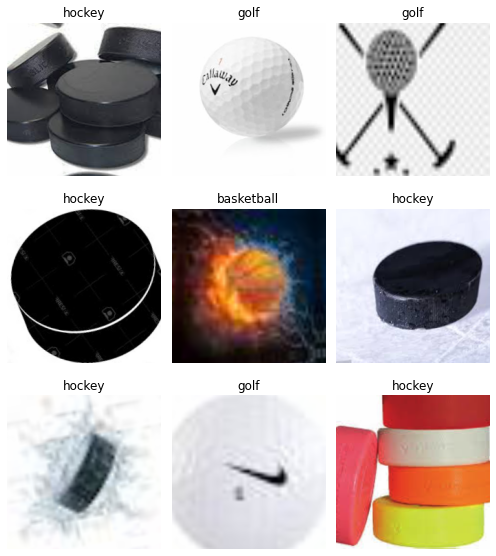

In [ ]:
#show sample of images 
data.show_batch(rows=3,figsize=(7,8))

In [ ]:
data.classes, data.c, len(data.train_ds), len(data.valid_ds)

(['american_football', 'baseball', 'basketball', 'golf', 'hockey'], 5, 219, 54)

In [ ]:
#create cnn_learner object
# use resnet 34 for transfer learning 
learn = cnn_learner(data, models.resnet34, metrics=error_rate)

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.cache/torch/checkpoints/resnet34-333f7ec4.pth


In [ ]:
# train 8 epochs of the model 
learn.fit_one_cycle(8)

epoch,train_loss,valid_loss,error_rate,time
0,2.578954,2.513885,0.703704,01:27
1,2.040087,0.681878,0.259259,01:09
2,1.498440,0.281563,0.092593,01:09
3,1.149697,0.248433,0.111111,01:08
4,0.911823,0.201186,0.074074,01:08
5,0.765980,0.176405,0.055556,01:08
6,0.646166,0.167807,0.055556,01:08
7,0.559372,0.166574,0.055556,01:08


In [ ]:
#save model
learn.save('model1_34', return_path=True)

In [ ]:
learn.load('model1_34')
interp = ClassificationInterpretation.from_learner(learn)

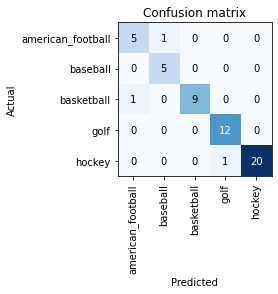

In [ ]:
#plot results of model on validation set 
interp.plot_confusion_matrix()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


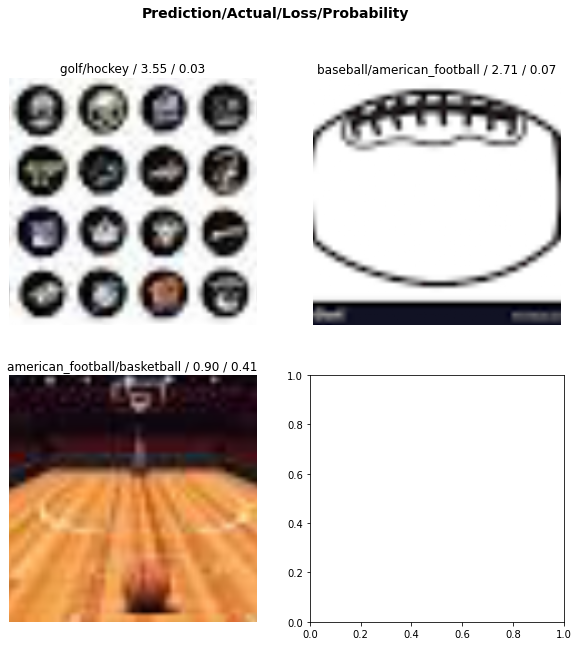

In [ ]:
# plot top losses (most wrong)
interp.plot_top_losses(3, figsize=(10,10))